In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
stock_raw = pd.read_csv(r'C:\Users\ericj\Desktop\Netflix through the Pandemic\project1/NFLX - COVID.csv', 
                        encoding = 'utf-8')

cases_raw = pd.read_csv(r'C:\Users\ericj\Desktop\Netflix through the Pandemic\project1/cases_shortened.csv',
                       encoding = 'utf-8')

In [4]:
stock_raw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200


In [5]:
print(len(stock_raw['Date']))

863


In [6]:
stock_close = stock_raw[['Date','Close']]
stock_close.head()

,Date,Close
0,2019-01-02,267.660004
1,2019-01-03,271.200012
2,2019-01-04,297.570007
3,2019-01-07,315.339996
4,2019-01-08,320.269989


In [7]:
cases_raw.head()

,Entity,Code,Day,Daily new confirmed cases of COVID-19,Daily new confirmed deaths due to COVID-19
0,World,OWID_WRL,2020-01-22,0,0
1,World,OWID_WRL,2020-01-23,100,1
2,World,OWID_WRL,2020-01-24,287,8
3,World,OWID_WRL,2020-01-25,493,16
4,World,OWID_WRL,2020-01-26,683,14


In [8]:
cases_raw = cases_raw.rename(columns={'Day' : 'Date'})
cases_by_date = cases_raw[['Date', 'Daily new confirmed cases of COVID-19']]
cases_by_date.head()

,Date,Daily new confirmed cases of COVID-19
0,2020-01-22,0
1,2020-01-23,100
2,2020-01-24,287
3,2020-01-25,493
4,2020-01-26,683


In [9]:
stock_cases = pd.merge(stock_close, cases_by_date, how = 'right')
stock_cases.head()

,Date,Close,Daily new confirmed cases of COVID-19
0,2020-01-22,326.000000,0
1,2020-01-23,349.600006,100
2,2020-01-24,353.160004,287
3,2020-01-25,NaN,493
4,2020-01-26,NaN,683


In [10]:
stock_cases = stock_cases.dropna()
print(stock_cases.head())
print(stock_cases.tail())
print(stock_cases['Daily new confirmed cases of COVID-19'].max())

         Date       Close  Daily new confirmed cases of COVID-19
0  2020-01-22  326.000000                                      0
1  2020-01-23  349.600006                                    100
2  2020-01-24  353.160004                                    287
5  2020-01-27  342.880005                                    809
6  2020-01-28  348.519989                                   2651
           Date       Close  Daily new confirmed cases of COVID-19
856  2022-05-27  195.190002                                 568074
860  2022-05-31  197.440002                                 618580
861  2022-06-01  192.910004                                 692064
862  2022-06-02  205.089996                                 524610
863  2022-06-03  198.979996                                 541954
4083952


In [11]:
stock_cases.count()

Date                                     598
Close                                    598
Daily new confirmed cases of COVID-19    598
dtype: int64

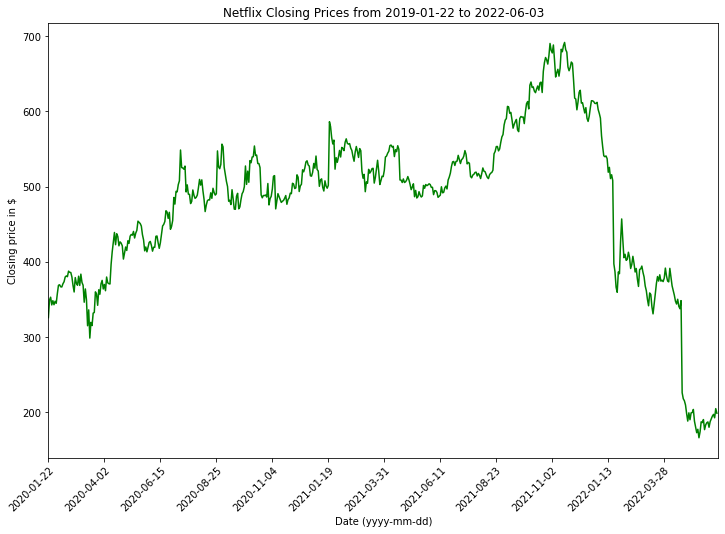

In [12]:
plt.figure(figsize=(12,8))
# If plt.figure does not change the size, try placing it before plt.plot!

plt.plot(stock_cases['Date'], stock_cases['Close'], color = 'green')
plt.xticks(np.arange(0, 598, 50), rotation = 45, rotation_mode = 'anchor', ha = 'right')
plt.xlim(0, 598)
plt.xlabel('Date (yyyy-mm-dd)')
plt.ylabel('Closing price in $')
plt.title('Netflix Closing Prices from 2019-01-22 to 2022-06-03')
plt.show()

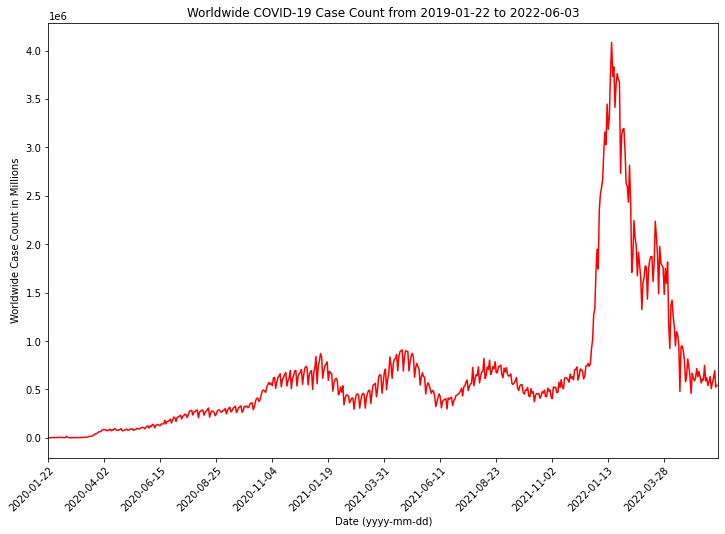

In [13]:
plt.figure(figsize=(12,8))
# If plt.figure does not change the size, try placing it before plt.plot!

plt.plot(stock_cases['Date'], stock_cases['Daily new confirmed cases of COVID-19'], color = 'red')
plt.xticks(np.arange(0, 598, 50), rotation = 45, rotation_mode = 'anchor', ha = 'right')
plt.xlim(0, 598)
plt.xlabel('Date (yyyy-mm-dd)')
plt.ylabel('Worldwide Case Count in Millions')
plt.title('Worldwide COVID-19 Case Count from 2019-01-22 to 2022-06-03')
plt.show()

In [14]:
scatter_data = stock_cases.set_index('Date')
scatter_data.head()

,Close,Daily new confirmed cases of COVID-19
Date,,
2020-01-22,326.000000,0
2020-01-23,349.600006,100
2020-01-24,353.160004,287
2020-01-27,342.880005,809
2020-01-28,348.519989,2651


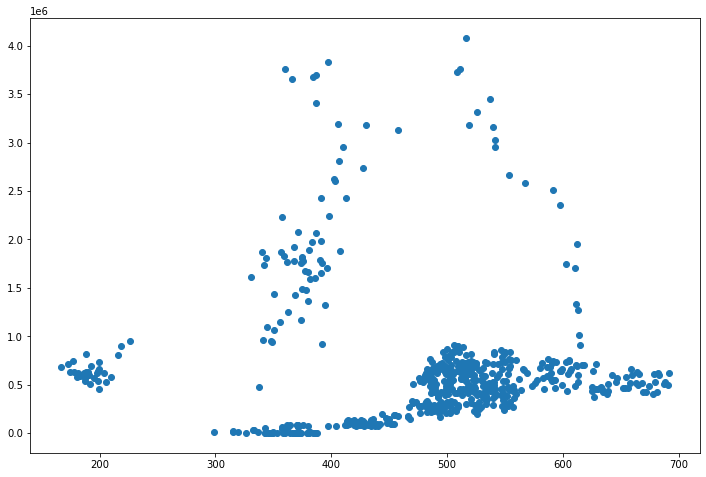

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(stock_cases['Close'], stock_cases['Daily new confirmed cases of COVID-19'])
plt.show()